In [1]:
# For Analysis 
import numpy as np 
import pandas as pd 
import geopandas as gpd 

# DateTime Format 
from datetime import datetime, timedelta, timezone

# Colors 
import calmap

# Grammar of graphics 
from plotnine import *

# 2D Plot 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns 

# Interactive Visualizations 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px 

## Data Import

In [2]:
# Import xlsx file and store each sheet in to a df list
xl_file = pd.ExcelFile("./data/data.xls",)
dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}

In [3]:
# Data from each sheet can be accessed via key
keylist = list(dfs.keys())

In [4]:
# Examine the sheet name 
keylist[1:10]

['2020-03-13-03-30',
 '2020-03-13-00-00',
 '2020-03-12-22-00',
 '2020-03-12-21-30',
 '2020-03-12-21-00',
 '2020-03-12-20-00',
 '2020-03-12-18-30',
 '2020-03-12-17-00',
 '2020-03-12-15-30']

## Data Exploring

In [5]:
# Examine first few rows 
dfs[keylist[0]].head(20)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,3/13/2020 06:00,67786,3062,51553
1,Guangdong,Mainland China,3/13/2020 06:00,1356,8,1296
2,Zhejiang,Mainland China,3/13/2020 06:00,1215,1,1209
3,Shandong,Mainland China,3/13/2020 06:00,760,7,739
4,Henan,Mainland China,3/13/2020 06:00,1273,22,1249
5,Anhui,Mainland China,3/13/2020 06:00,990,6,984
6,Jiangxi,Mainland China,3/13/2020 06:00,935,1,934
7,Hunan,Mainland China,3/13/2020 06:00,1018,4,1005
8,Heilongjiang,Mainland China,3/13/2020 06:00,482,13,446
9,Sichuan,Mainland China,3/13/2020 06:00,539,3,503


In [6]:
# Check datamatrix 
dfs[keylist[0]].shape

(221, 6)

In [61]:
# Basic info about dataset 
dfs[keylist[0]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
Province/State    99 non-null object
Country/Region    217 non-null object
Last Update       217 non-null object
Confirmed         217 non-null int64
Deaths            217 non-null int64
Recovered         217 non-null int64
dtypes: int64(3), object(3)
memory usage: 10.3+ KB


In [7]:
# Numerical summary of dataset
dfs[keylist[0]].describe()

,Confirmed,Deaths,Recovered
count,221.000000,221.000000,221.000000
mean,614.687783,22.570136,318.411765
std,4743.872687,218.452514,3475.887702
min,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,21.000000,0.000000,0.000000
75%,96.000000,1.000000,6.000000
max,67786.000000,3062.000000,51553.000000


## Data Cleaning

In [8]:
# Data Cleaning 
for key, df in dfs.items():
    dfs[key].loc[:, 'Confirmed'].fillna(value=0, inplace=True)
    dfs[key].loc[:, 'Deaths'].fillna(value=0, inplace=True)
    dfs[key].loc[:, 'Recovered'].fillna(value=0, inplace=True)
   
    # Convert cases into integer
    dfs[key] = dfs[key].astype({'Confirmed':'int64', 'Deaths':'int64', 'Recovered':'int64'})
    
    # Replace 
    dfs[key] = dfs[key].replace({'Country/Region': 'Mainland China'}, 'China')
    dfs[key] = dfs[key].replace({'Country/Region': 'Queensland'}, 'Brisbane')
    dfs[key] = dfs[key].replace({'Country/Region': 'New South Wales'}, 'Sydney')
    dfs[key] = dfs[key].replace({'Country/Region': 'Victoria'}, 'Melbourne')
    dfs[key]=dfs[key].replace({'Province/State':'South Australia'}, 'Adelaide')

    # DateTime Format 
    dfs[key]['Last Update'] = '0' + dfs[key]['Last Update']
    dfs[key]['Date_last_updated'] = [datetime.strptime(d, '%m/%d/%Y %H:%M') for d in dfs[key]['Last Update']]

In [9]:
# Take a look at cleaned data 
dfs[keylist[0]].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date_last_updated
0,Hubei,China,03/13/2020 06:00,67786,3062,51553,2020-03-13 06:00:00
1,Guangdong,China,03/13/2020 06:00,1356,8,1296,2020-03-13 06:00:00
2,Zhejiang,China,03/13/2020 06:00,1215,1,1209,2020-03-13 06:00:00
3,Shandong,China,03/13/2020 06:00,760,7,739,2020-03-13 06:00:00
4,Henan,China,03/13/2020 06:00,1273,22,1249,2020-03-13 06:00:00


## Creating DataFrame for Cases

In [10]:
# Total No. of cases 
confirmed_cases = dfs[keylist[0]]['Confirmed'].sum()
deaths_cases = dfs[keylist[0]]['Deaths'].sum()
recovered_cases = dfs[keylist[0]]['Recovered'].sum()
active_cases = dfs[keylist[0]]['Confirmed'].sum() - dfs[keylist[0]]['Recovered'].sum() - dfs[keylist[0]]['Deaths'].sum()

In [11]:
# Print the Total no. of cases in first dataset
print("Confirmed Cases = ", confirmed_cases)
print("Death Cases = ", deaths_cases)
print("Recovered Cases = ", recovered_cases)
print("Active Cases = ", active_cases)

Confirmed Cases =  135846
Death Cases =  4988
Recovered Cases =  70369
Active Cases =  60489


In [12]:
closed_cases = recovered_cases + deaths_cases
print("Closed Cases = ",closed_cases)

Closed Cases =  75357


In [13]:
# % of Recovered 
recovered_percent = round((recovered_cases / closed_cases),2) * 100 
print(f"Recovered/Discharged = {recovered_percent}%") 

Recovered/Discharged = 93.0%


In [16]:
# % of Deaths
deaths_percent = (deaths_cases / closed_cases) * 100 
print(f"Deaths = {deaths_percent}") 

Deaths = 6.619159467600887


## Case Fatality Rate 
$Case Fatality Rate(CFR) = \frac {Deaths(of 100 Cases)}{Confirmed Cases} \times 100$

In [17]:
CFR = deaths_cases/ confirmed_cases
CFR_Percent = CFR * 100
print(f"CFR = {CFR_Percent}")

CFR = 3.6718048378310733


## Confirmed Cases

In [18]:
# Construct new dataframe called df_confirmed for line plot 
DateList = []
ChinaList =[]
OtherList = []

for key, df in dfs.items():
    # Group by Country/Region and Sum
    dfTemp = df.groupby(['Country/Region'])['Confirmed'].agg(np.sum)
    # Make a df with dfTemp index and values and store in dfTemp
    dfTemp = pd.DataFrame({'Code':dfTemp.index, 'Confirmed':dfTemp.values})
    # Sorting values by Confirmed 
    dfTemp = dfTemp.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
    # Append dfTemp to DateList in df[0]
    DateList.append(df['Date_last_updated'][0])
    # Append dfTemp to ChinaList df[0]
    ChinaList.append(dfTemp['Confirmed'][0])
    # Append dfTemp to Otherlist df[1:]
    OtherList.append(dfTemp['Confirmed'][1:].sum())

# Make Confirmed dataframe with DateList, ChinaList, OtherList 
# Column name Date, Mainland China, Other Locations 
df_confirmed = pd.DataFrame({'Date':DateList,
                             'Mainland China':ChinaList,
                             'Other locations':OtherList})  


# Sorting and index reset 
df_confirmed['date_day']=[d.date() for d in df_confirmed['Date']]
df_confirmed=df_confirmed.groupby(by=df_confirmed['date_day'], sort=False).transform(max).drop_duplicates(['Date'])
df_confirmed['Total']=df_confirmed['Mainland China']+df_confirmed['Other locations']
df_confirmed=df_confirmed.reset_index(drop=True)

In [19]:
# Examine confirmed dataset
df_confirmed.head()

,Date,Mainland China,Other locations,Total
0,2020-03-13 06:00:00,80801,55045,135846
1,2020-03-12 22:00:00,80801,53930,134731
2,2020-03-11 22:30:00,80791,45562,126353
3,2020-03-10 23:00:00,80778,38469,119247
4,2020-03-09 22:30:00,80754,33717,114471


## Recovered Cases

In [20]:
# Construct new dataframe called df_recovered for line plot 
DateList = []
ChinaList =[]
OtherList = []

for key, df in dfs.items():
    # Group by Country/Region and Sum
    dfTemp = df.groupby(['Country/Region'])['Recovered'].agg(np.sum)
    # Make a df with dfTemp index and values and store in dfTemp
    dfTemp = pd.DataFrame({'Code':dfTemp.index, 'Recovered':dfTemp.values})
    # Sorting values by Confirmed 
    dfTemp = dfTemp.sort_values(by='Recovered', ascending=False).reset_index(drop=True)
    # Append dfTemp to DateList in df[0]
    DateList.append(df['Date_last_updated'][0])
    # Append dfTemp to ChinaList df[0]
    ChinaList.append(dfTemp['Recovered'][0])
    # Append dfTemp to Otherlist df[1:]
    OtherList.append(dfTemp['Recovered'][1:].sum())

# Make Confirmed dataframe with DateList, ChinaList, OtherList 
# Column name Date, Mainland China, Other Locations 
df_recovered = pd.DataFrame({'Date':DateList,
                             'Mainland China':ChinaList,
                             'Other locations':OtherList})  


# Sorting and index reset 
df_recovered['date_day']=[d.date() for d in df_recovered['Date']]
df_recovered=df_recovered.groupby(by=df_recovered['date_day'], sort=False).transform(max).drop_duplicates(['Date'])
df_recovered['Total']=df_recovered['Mainland China']+df_recovered['Other locations']
df_recovered=df_recovered.reset_index(drop=True)

In [21]:
df_recovered.head()

,Date,Mainland China,Other locations,Total
0,2020-03-13 06:00:00,64119,6250,70369
1,2020-03-12 22:00:00,64111,6243,70354
2,2020-03-11 22:30:00,62780,5492,68272
3,2020-03-10 23:00:00,61459,5134,66593
4,2020-03-09 22:30:00,59884,4168,64052


## Deaths Cases

In [22]:
# Construct new dataframe called df_deaths for line plot 
DateList = []
ChinaList =[]
OtherList = []

for key, df in dfs.items():
    # Group by Country/Region and Sum
    dfTemp = df.groupby(['Country/Region'])['Deaths'].agg(np.sum)
    # Make a df with dfTemp index and values and store in dfTemp
    dfTemp = pd.DataFrame({'Code':dfTemp.index, 'Deaths':dfTemp.values})
    # Sorting values by Confirmed 
    dfTemp = dfTemp.sort_values(by='Deaths', ascending=False).reset_index(drop=True)
    # Append dfTemp to DateList in df[0]
    DateList.append(df['Date_last_updated'][0])
    # Append dfTemp to ChinaList df[0]
    ChinaList.append(dfTemp['Deaths'][0])
    # Append dfTemp to Otherlist df[1:]
    OtherList.append(dfTemp['Deaths'][1:].sum())

# Make Confirmed dataframe with DateList, ChinaList, OtherList 
# Column name Date, Mainland China, Other Locations 
df_deaths = pd.DataFrame({'Date':DateList,
                             'Mainland China':ChinaList,
                             'Other locations':OtherList})  


# Sorting and index reset 
df_deaths['date_day']=[d.date() for d in df_deaths['Date']]
df_deaths=df_deaths.groupby(by=df_deaths['date_day'], sort=False).transform(max).drop_duplicates(['Date'])
df_deaths['Total']=df_deaths['Mainland China']+df_deaths['Other locations']
df_deaths=df_deaths.reset_index(drop=True)

In [23]:
df_deaths.head()

,Date,Mainland China,Other locations,Total
0,2020-03-13 06:00:00,3176,1812,4988
1,2020-03-12 22:00:00,3176,1802,4978
2,2020-03-11 22:30:00,3169,1463,4632
3,2020-03-10 23:00:00,3158,1140,4298
4,2020-03-09 22:30:00,3136,890,4026


## Linear & Logarithmic Line Plot for Total Cases, Deaths, Recovered(Worlwide)

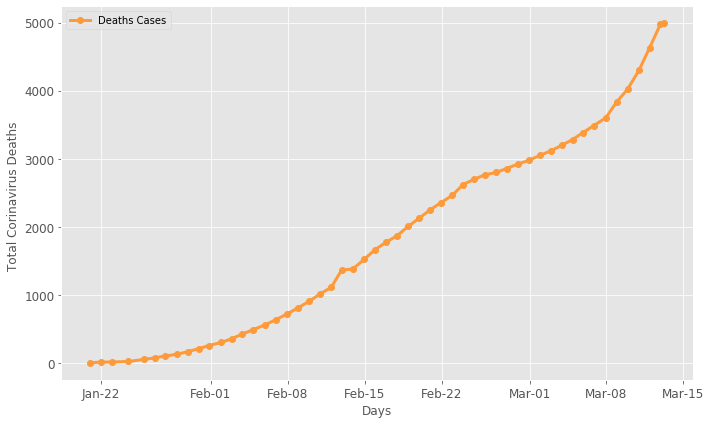

In [24]:
# Linear Scale for Total Confrmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_deaths['Total'], marker='o', color='#fe9a3a', linewidth=3, label='Deaths Cases')
# ax.plot(df_confirmed['Date'], df_confirmed['Other locations'], marker='o', color='#c2Ed4e', linewidth=3, label='Other Region')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.set_yscale('linear')  
ax.set_xlabel('Days', fontsize=12)
ax.set_ylabel('Total Corinavirus Deaths ', fontsize=12)  

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.tight_layout() 
plt.legend(loc="upper left")
plt.show()

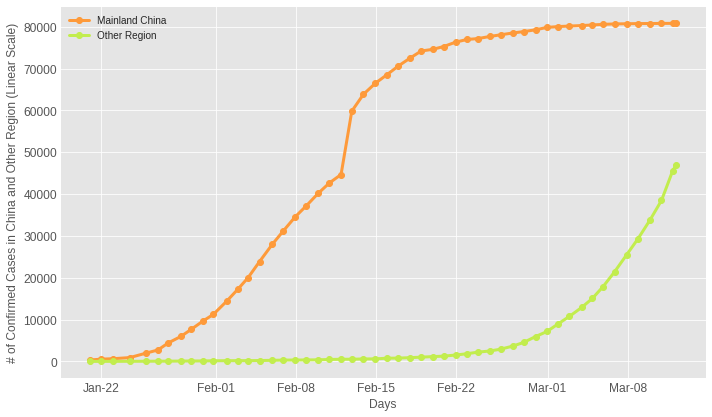

In [121]:
# Linear Scale for Total Confrmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'], marker='o', color='#fe9a3a', linewidth=3, label='Mainland China')
ax.plot(df_confirmed['Date'], df_confirmed['Other locations'], marker='o', color='#c2Ed4e', linewidth=3, label='Other Region')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.set_yscale('linear')  
ax.set_xlabel('Days', fontsize=12)
ax.set_ylabel('# of Confirmed Cases in China and Other Region (Linear Scale)', fontsize=12)  

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.tight_layout() 
plt.legend(loc="upper left")
plt.show()

In [143]:
plt.style.available

['seaborn-dark-palette',
 'seaborn-ticks',
 'fast',
 'seaborn-bright',
 'seaborn-talk',
 'tableau-colorblind10',
 'ggplot',
 'dark_background',
 'seaborn-deep',
 'seaborn-white',
 'grayscale',
 'seaborn-dark',
 'bmh',
 'seaborn-notebook',
 'classic',
 'seaborn-pastel',
 'fivethirtyeight',
 '_classic_test',
 'seaborn-whitegrid',
 'seaborn-darkgrid',
 'seaborn-paper',
 'Solarize_Light2',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'seaborn-poster']

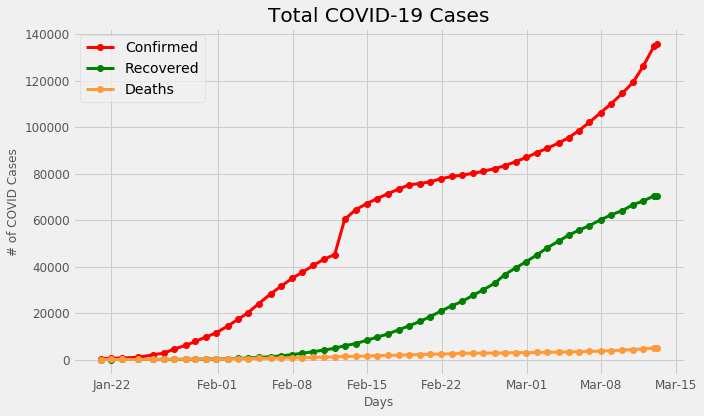

In [27]:
# Linear Scale for Total Confrmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='red', linewidth=3, label='Confirmed')
ax.plot(df_confirmed['Date'], df_recovered['Total'], marker='o', color='green', linewidth=3, label='Recovered')
ax.plot(df_confirmed['Date'], df_deaths['Total'], marker='o', color='#fe9a3a', linewidth=3, label='Deaths') 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.set_title('Total COVID-19 Cases')
ax.set_yscale('linear')   
ax.set_xlabel('Days', fontsize=12)
ax.set_ylabel('# of COVID Cases', fontsize=12)  

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.tight_layout() 
plt.legend()
plt.savefig('corona_update.jpg')
plt.show()

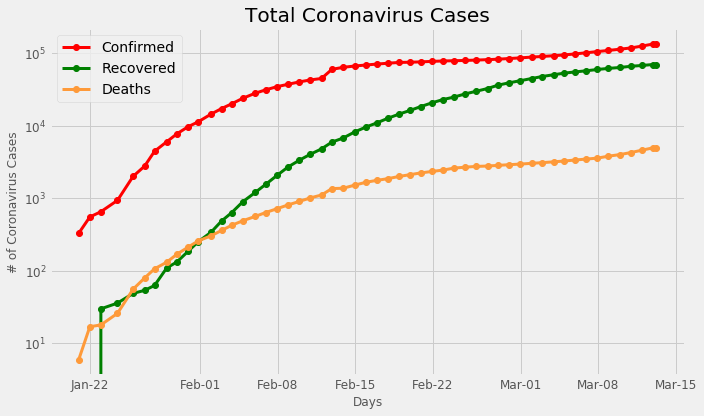

In [26]:
# Linear Scale for Total Confrmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='red', linewidth=3, label='Confirmed')
ax.plot(df_confirmed['Date'], df_recovered['Total'], marker='o', color='green', linewidth=3, label='Recovered')
ax.plot(df_confirmed['Date'], df_deaths['Total'], marker='o', color='#fe9a3a', linewidth=3, label='Deaths') 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.set_title('Total Coronavirus Cases')
ax.set_yscale('log')  
ax.set_xlabel('Days', fontsize=12)
ax.set_ylabel('# of Coronavirus Cases', fontsize=12)  

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.tight_layout() 
plt.legend()
# plt.savefig('corona_update.jpg')
plt.show()

In [ ]:
# Linear Scale for Total Confrmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.set_yscale('linear')
# ax.set_title('Total Cases')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases (Linear Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Log Scale for Total Confirmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log') 
# ax.set_title('Total Cases')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases (Log Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Linear Scale for Total Deaths Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_deaths['Date'], df_deaths['Total'], marker='o', color='#921113', linewidth=3) 
date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('linear')
# ax.set_title('Total Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Deaths (Linear Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Log Scale for Total Deaths Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(111)
ax.plot(df_deaths['Date'], df_deaths['Total'], marker='o', color='#921113', linewidth=3) 
date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('log')
# ax.set_title('Total Deaths')
ax.set_xlabel('Cases')
ax.set_ylabel('Total COVID-19 Deaths (Log Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Linear Scale for Total Recovered Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_deaths['Date'], df_recovered['Total'], marker='o', color='crimson', linewidth=3) 
date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('linear')
# ax.set_title('Total Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered (Linear Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Log Scale 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_deaths['Date'], df_recovered['Total'], marker='o', color='crimson', linewidth=3) 
date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('log') 
# ax.set_title('Total Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered (Log Scale)')
plt.tight_layout()
plt.show()

## Linear & Logarithmic Line Plot for Total Cases, Deaths, Recovered(China)

In [ ]:
# Linear Scale for Total Confirmed Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'], marker='o', color='blue', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date') 
ax.set_ylabel('Total COVID-19 Cases in China (Linear Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Log Scale for Total Confirmed Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'], marker='o', color='purple', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date') 
ax.set_ylabel('Total COVID-19 Cases in China (Linear Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Linear Scale for Total Recovered Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_recovered['Mainland China'], marker='o', color='crimson', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases in China (Linear Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Log Scale for Total Recovered Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'], marker='o', color='crimson', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases in China (Log Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Linear Scale for Total Deaths Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_deaths['Mainland China'], marker='o', color='crimson', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases in China (Log Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Log Scale for Total Deaths Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_deaths['Mainland China'], marker='o', color='crimson', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases in China (Log Scale)')
plt.tight_layout()
plt.show()

## Comparison

In [ ]:
# Linear Scale for Comaprison Confirmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_confirmed['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Confirmed Cases(Linear Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Log Scale for Comparison Confirmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_confirmed['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Confirmed Cases(Log Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Linear Scale for Comparison Recovered Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_recovered['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_recovered['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered Cases(Linear Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Log Scale for Comparison Recovered Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_recovered['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_recovered['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered Cases(Log Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Linear Scale for Comparison Deaths Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_deaths['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_recovered['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Deaths Cases(Linear Scale)')
plt.tight_layout()
plt.show()

In [ ]:
# Linear Scale for Comparison Deaths Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_deaths['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_recovered['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Deaths Cases(Log Scale)')
plt.tight_layout()
plt.show()

## Subplots 

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(111)
ax.plot(df_deaths['Date'], df_recovered['Total'], marker='o', color='crimson', linewidth=3) 
date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('log') 
ax.set_title('Total Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered (Linear Scale)')
plt.tight_layout()
plt.show()

In [ ]:
fig , ax = plt.subplot(121)
ax.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
date = [datetime.strftime(d, '%b %d') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('linear') 
ax.set_title('Total Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered (Linear Scale)')


ax.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
date = [datetime.strftime(d, '%b %d') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('log') 
ax.set_title('Total Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered (Log Scale)')
plt.tight_layout()
plt.show()

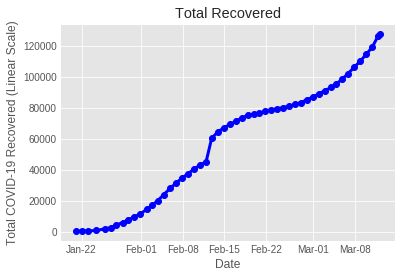

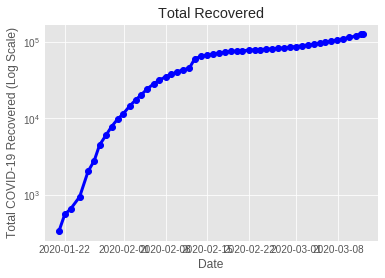

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [131]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig1 = plt.figure(figsize=(10,6))
fig2 = plt.figure(figsize=(10,6))

ax1.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))   
ax1.set_yscale('linear') 
ax1.set_title('Total Recovered')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total COVID-19 Recovered (Linear Scale)')

ax2.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))   
ax2.set_yscale('log') 
ax2.set_title('Total Recovered')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total COVID-19 Recovered (Log Scale)')


plt.tight_layout()

plt.show()

In [12]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

- Data Source-https://github.com/Perishleaf/data-visualisation-scripts/blob/master/dash-2019-coronavirus/data.xls